In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.model_selection import cross_val_score

In [38]:
df = pd.read_csv("25k IMDb movie Dataset.csv")
len(df)
df.sample(10)

,movie title,Run Time,Rating,User Rating,Generes,Overview,Plot Kyeword,Director,Top 5 Casts,Writer,year,path
23907,Let Him Have It,1 hour 55 minutes,7.2,3.6K,"['Crime', 'Drama', 'History']",This drama reveals the controversial postwar 1...,"['courtroom drama', 'legal drama', 'timeframe ...",Peter Medak,"['Robert Wade', 'Tom Courtenay', 'Christopher ...",Neal Purvis,-1991,/title/tt0102288/
13075,The Policeman's Lineage,1 hour 59 minutes,6.1,427,"['Crime', 'Drama']",Parasite's Woo-sik Choi stars as one of the tw...,[],Kyu-maan Lee,"['Cho Jin-woong', 'Choi Woo-sik', 'Hee-soon Pa...",Bae Young-Ik,-2022,/title/tt16676718/
23323,Painter,not-released,5,238,"['Drama', 'Thriller']",A wealthy art collector's obsession with a you...,"['jealousy', 'painter as artist', 'one word ti...",Cory Wexler Grant,"['Betsy Randle', 'Eric Ladin', 'Anastasia Ledd...",Cory Wexler Grant,-2020,/title/tt7772872/
10001,Kill the Irishman,"$12,000,000 (estimated)",7,49K,"['Biography', 'Crime', 'Drama']","The true story of Danny Greene, a tough Irish ...","[""shot in the back of one's head"", 'assassinat...",Jonathan Hensleigh,"['Jeremy Walters', 'Rick Porrello', 'Ray Steve...",Jonathan Hensleigh,-2011,/title/tt1416801/
4692,Indrajit,not-released,8.1,23,['Action'],Biswajit is a renowned barrister. He has two y...,[],Anjan Choudhury,"['Ranjit Mallick', 'Anil Chatterjee', 'Anup Ku...",Anjan Choudhury,-1992,/title/tt1590999/
10800,Tiptoes,not-released,4.3,5.1K,"['Comedy', 'Drama', 'Romance']",The story of a peculiar love triangle involvin...,"['fraternal twins', 'artist', 'reference to go...",Matthew Bright,"['Gary Oldman', 'Peter Dinklage', 'Kate Beckin...",Matthew Bright,-2002,/title/tt0316768/
14591,And Then Came Lola,not-released,3.9,1.7K,"['Comedy', 'Drama', 'Romance']","In this sexy lesbian romp, Lola will lose her ...","['timeloop', 'photographer', 'f rated', 'sex t...",Ellen Seidler,"['Ellen Seidler', 'Megan Siler', 'Ashleigh Sum...",Megan Siler,-2009,/title/tt1123894/
19631,The Alien Dead,1 hour 14 minutes,2.8,1.1K,"['Comedy', 'Horror', 'Sci-Fi']",A meteor strikes a houseboat in the swamps nea...,"['swamp', 'southern accent', 'redneck', 'eaten...",Fred Olen Ray,"['Martin Nicholas', 'Buster Crabbe', 'Ray Robe...",Fred Olen Ray,-1980,/title/tt0080346/
244,The Magnificent Seven,2 hours 12 minutes,6.8,209K,"['Action', 'Adventure', 'Western']",Seven gunmen from a variety of backgrounds are...,"['showdown', 'bounty hunter', 'good versus evi...",Antoine Fuqua,"['Shinobu Hashimoto', 'Hideo Oguni', 'Denzel W...",Akira Kurosawa,-2016,/title/tt2404435/
10111,Ben Is Back,1 hour 43 minutes,6.7,22K,['Drama'],A drug addicted teenage boy shows up unexpecte...,"['drug dealing', 'mother son relationship', 'g...",Peter Hedges,"['Julia Roberts', 'Lucas Hedges', 'Courtney B....",Peter Hedges,-2018,/title/tt7545524/


In [3]:
df.drop_duplicates()
df.pop("Overview")
df.pop("Plot Kyeword")
df.pop("path")
len(df)

24402

In [4]:
df = df[df['Rating'] != 'no-rating']
len(df)

22662

In [5]:
df = df[df['Run Time'].astype(str).str[0].isin(map(str, range(1, 10)))]
len(df)

11335

In [6]:
df.isnull().sum()

movie title    0
Run Time       0
Rating         0
User Rating    0
Generes        0
Director       0
Top 5 Casts    0
Writer         0
year           6
dtype: int64

In [7]:
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)

             movie title            Run Time Rating User Rating  \
496             Napoleon  5 hours 30 minutes    8.2        7.8K   
562      I Saw the Devil  2 hours 24 minutes    7.8        127K   
1062          The Killer   1 hour 39 minutes      6        2.7K   
2739           The Tiger  2 hours 19 minutes    7.2        5.6K   
5741            Apaharan  2 hours 53 minutes    7.4        4.8K   
12915  Mothers' Instinct   1 hour 37 minutes    6.5        1.5K   

                                 Generes                Director  \
496    ['Biography', 'Drama', 'History']              Abel Gance   
562         ['Action', 'Crime', 'Drama']            Jee-woon Kim   
1062               ['Action', 'Western']          Marcelo Galvão   
2739    ['Action', 'Adventure', 'Drama']          Park Hoon-jung   
5741        ['Action', 'Crime', 'Drama']             Prakash Jha   
12915   ['Drama', 'Mystery', 'Thriller']  Olivier Masset-Depasse   

                                             Top 5 Ca

In [8]:
def convert_to_minutes(time_string):
    words = time_string.split()
    hours = int(words[0])
    total_minutes = hours * 60
    if len(words) > 2:
        minutes = int(words[2])
        total_minutes += minutes
    return total_minutes
df['Run Time'] = df['Run Time'].apply(convert_to_minutes)
df.sample(5)

,movie title,Run Time,Rating,User Rating,Generes,Director,Top 5 Casts,Writer,year
13995,Les amants criminels,96,6.5,4.2K,"['Crime', 'Drama', 'Thriller']",François Ozon,"['Marcia Romano', 'Annabelle Perrichon', 'Nata...",François Ozon,-1999
10826,Leviathan,140,7.6,53K,"['Crime', 'Drama']",Andrey Zvyagintsev,"['Andrey Zvyagintsev', 'Aleksey Serebryakov', ...",Oleg Negin,-1989
19513,The Dark Tapes,98,4.6,3.2K,"['Horror', 'Mystery', 'Sci-Fi']",Michael McQuown,"['Michael McQuown', 'David Banks', 'Sara Areya...",Vincent J. Guastini,-2016
24048,The Cross and the Switchblade,106,5.9,1.1K,"['Biography', 'Crime', 'Drama']",Don Murray,"['James Bonnet', 'Elizabeth Sherrill', 'Pat Bo...",Don Murray,-1970
13709,Le pont du Nord,129,6.8,1.2K,"['Adventure', 'Crime', 'Drama']",Jacques Rivette,"['Pascale Ogier', 'Suzanne Schiffman', 'Bulle ...",Bulle Ogier,-1981


In [9]:
df = df[(df['Run Time'] >= 40) & (df['Run Time'] <= 300)]
len(df)

11306

In [10]:
def convert_to_int(ratings_quantity_string):
    if str(ratings_quantity_string[-1]) == "K":
        ratings_quantity = int(float(ratings_quantity_string[:-1]) * 1000)
    else:
        ratings_quantity = int(ratings_quantity_string)
    return ratings_quantity
df['User Rating'] = df['User Rating'].apply(convert_to_int)
df.sample(5)

,movie title,Run Time,Rating,User Rating,Generes,Director,Top 5 Casts,Writer,year
10314,Poison Ivy II,106,4.4,5900,"['Drama', 'Thriller']",Anne Goursaud,"['Alyssa Milano', 'Johnathon Schaech', 'Xander...",Chloe King,-1996
8543,St. Elmo's Fire,110,6.3,42000,"['Drama', 'Romance']",Joel Schumacher,"['Carl Kurlander', 'Demi Moore', 'Rob Lowe', '...",Joel Schumacher,-1985
4009,The Crew,81,6.3,5200,"['Action', 'Crime', 'Drama']",Julien Leclercq,"['Simon Moutairou', 'Sami Bouajila', 'Guillaum...",Julien Leclercq,-2008
8548,Lansky,119,6.2,7100,"['Biography', 'Crime', 'Drama']",Eytan Rockaway,"['Robert Rockaway', 'Harvey Keitel', 'Sam Wort...",Eytan Rockaway,-2021
12455,Starbuck,109,7.2,16000,"['Comedy', 'Drama', 'Romance']",Ken Scott,"['Martin Petit', 'Patrick Huard', 'Julie LeBre...",Ken Scott,-2011


In [11]:
df = df[(df['User Rating'] > 50)]
len(df)

11279

In [12]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.sample(5)

,movie title,Run Time,Rating,User Rating,Generes,Director,Top 5 Casts,Writer,year
9801,Cemetery Junction,95,6.8,23000,"['Comedy', 'Drama']",Ricky Gervais,"['Ricky Gervais', 'Stephen Merchant', 'Christi...",Stephen Merchant,-2010
18642,The Foot Fist Way,85,6.2,13000,['Comedy'],Jody Hill,"['Jody Hill', 'Danny McBride', 'Danny McBride'...",Ben Best,-2006
15840,Still of the Night,93,6.0,5100,"['Crime', 'Drama', 'Mystery']",Robert Benton,"['David Newman', 'Roy Scheider', 'Meryl Streep...",Robert Benton,-1982
10626,The Falling,102,5.3,6900,"['Drama', 'Mystery', 'Thriller']",Carol Morley,"['Maxine Peake', 'Maisie Williams', 'Florence ...",Carol Morley,-2014
6104,The Story of Dr. Wassell,140,6.7,996,"['Action', 'Adventure', 'Drama']",Cecil B. DeMille,"['Charles Bennett', 'Corydon M. Wassell', 'Gar...",Alan Le May,-1944


In [13]:
df['year'] = df['year'].astype(str)  # Convert to string to ensure compatibility
df['year'] = df['year'].str.extract(r'(\d{4})')
df.dropna(inplace=True)
df['year'] = df['year'].astype(int)
df.sample(5)

,movie title,Run Time,Rating,User Rating,Generes,Director,Top 5 Casts,Writer,year
21128,Cleaner,88,6.1,42000,"['Crime', 'Mystery', 'Thriller']",Renny Harlin,"['Samuel L. Jackson', 'Ed Harris', 'Eva Mendes...",Matthew Aldrich,2007
14627,Ville-Marie,101,5.8,813,['Drama'],Guy Édoin,"['Guy Édoin', 'Monica Bellucci', 'Pascale Buss...",Jean-Simon DesRochers,2015
13929,The Prophet's Game,106,4.8,1100,"['Crime', 'Drama', 'Thriller']",David Worth,"['Dennis Hopper', 'Stephanie Zimbalist', 'Robe...",Carol Chrest,2000
11731,To the Shores of Tripoli,86,6.0,862,"['Drama', 'Romance', 'War']",H. Bruce Humberstone,"['Steve Fisher', 'John Payne', ""Maureen O'Hara...",Lamar Trotti,1942
5161,Can Feda,109,5.4,1500,"['Action', 'War']",Çagatay Tosun,"['Burak Özçivit', 'Kerem Bürsin', 'Melike Yalo...",Zafer Külünk,2018


In [14]:
current_year = datetime.now().year
df = df[df['year'] <= current_year]
len(df)

11263

Mean Cross-Validated MSE: 1.215312255649678
Standard Deviation Cross-Validated MSE: 0.20981319392224815
Mean Squared Error: 1.1875270448363247
Mean Absolute Error: 0.8422876680467926
R-squared: 0.10582460822809847


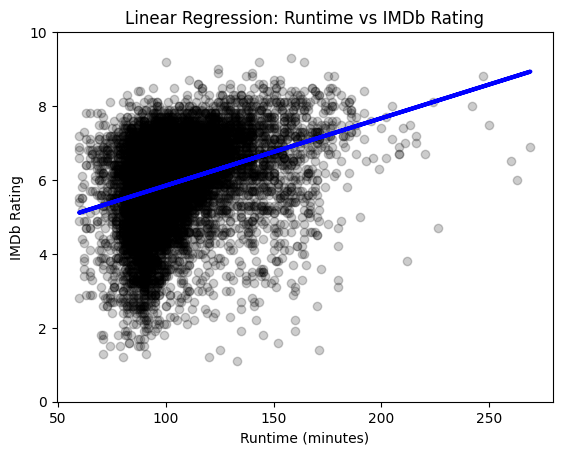

In [37]:
X = df[['Run Time']]
y = df['Rating']

# Perform 5-fold cross-validation
cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns negative MSE)
cv_mse = -cv_scores

# Print the mean and standard deviation of the cross-validated MSE
print(f'Mean Cross-Validated MSE: {cv_mse.mean()}')
print(f'Standard Deviation Cross-Validated MSE: {cv_mse.std()}')

# Fit the model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Predict on the entire dataset
y_pred = model.predict(X)

# Evaluate the Model
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

results = {}
results["Linear Regression"] = {"MSE": mse, "MAE": mae, "R^2": r2}

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plotting
plt.scatter(X, y, color='black', alpha=0.2)
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.title('Linear Regression: Runtime vs IMDb Rating')
plt.ylim(0, 10)
plt.show()

Best Model Degree: 2
Mean Squared Error: 1.1703906278454441
Mean Absolute Error: 0.8345494670661158
R-squared: 0.11872786162600257


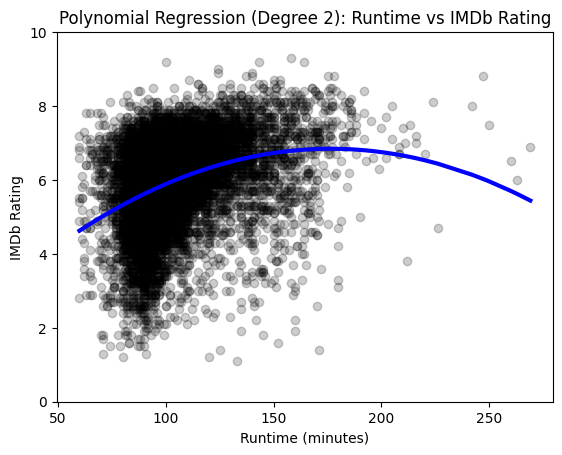

In [22]:
# Assuming df is your DataFrame
df_sorted = df.sort_values(by='Run Time')

X = df_sorted[['Run Time']]
y = df_sorted['Rating']

# Set the number of folds (e.g., 5 for 5-fold cross-validation)
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

best_degree = None
best_bic = np.inf  # Initialize with infinity

for degree in range(1, 100):  # Try degrees from 1 to 5 (you can adjust the range)
    bic_sum = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        n = len(X_test)
        k = degree + 1  # Number of parameters in the model (degree + 1 for the intercept)
        bic = n * np.log(mse) + k * np.log(n)  # Bayesian Information Criterion (BIC)
        
        bic_sum += bic

    average_bic = bic_sum / n_folds

    if average_bic < best_bic:
        best_bic = average_bic
        best_degree = degree

# Train the best model with the selected degree on the entire dataset
best_model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
best_model.fit(X, y)

# Evaluate the Model
y_pred = best_model.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

results["Polynomial Regression"] = {"MSE": mse, "MAE": mae, "R^2": r2}

print(f'Best Model Degree: {best_degree}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plotting with ordered x-values
plt.scatter(X, y, color='black', alpha=0.2)
plt.plot(df_sorted['Run Time'], best_model.predict(df_sorted[['Run Time']]), color='blue', linewidth=3)
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.title(f'Polynomial Regression (Degree {best_degree}): Runtime vs IMDb Rating')
plt.ylim(0, 10)
plt.show()

Best Parameters: {'polynomialfeatures__degree': 6, 'ridge__alpha': 10}
Mean Squared Error: 1.151991660296368
Mean Absolute Error: 0.8277366696828095
R-squared: 0.13258178106971608


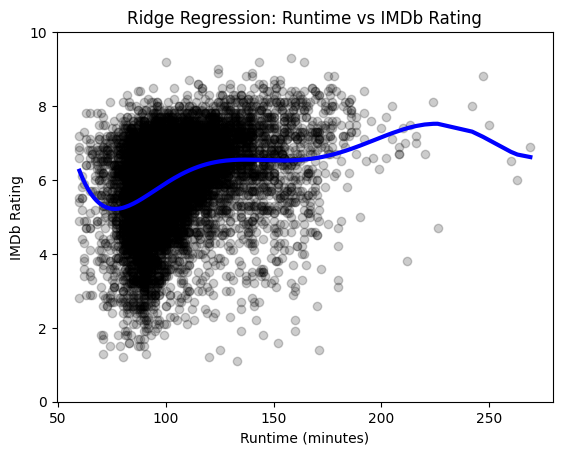

In [23]:
from sklearn.model_selection import GridSearchCV

# Assuming df is your DataFrame
df_sorted = df.sort_values(by='Run Time')

X = df_sorted[['Run Time']]
y = df_sorted['Rating']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the number of folds (e.g., 5 for 5-fold cross-validation)
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Define the parameter grid
param_grid = {
    'polynomialfeatures__degree': range(1, 10),
    'ridge__alpha': [0.01, 0.1, 1, 10]
}

# Create the pipeline
model = make_pipeline(PolynomialFeatures(), Ridge())

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_scaled, y)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best Ridge model on the entire dataset
best_model = grid_search.best_estimator_
best_model.fit(X_scaled, y)

# Evaluate the Model
y_pred = best_model.predict(X_scaled)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

results["Ridge Regression"] = {"MSE": mse, "MAE": mae, "R^2": r2}

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plotting with ordered x-values
plt.scatter(X, y, color='black', alpha=0.2)
plt.plot(df_sorted['Run Time'], best_model.predict(X_scaled), color='blue', linewidth=3)
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.title(f'Ridge Regression: Runtime vs IMDb Rating')
plt.ylim(0, 10)
plt.show()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.593e+03, tolerance: 1.496e+00
  model = cd_fast.enet_coordinate_descent(


Best Parameters: {'lasso__alpha': 0.01, 'polynomialfeatures__degree': 9}
Mean Squared Error: 1.15566908730161
Mean Absolute Error: 0.8295006690689992
R-squared: 0.12981277909420486


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.593e+03, tolerance: 1.496e+00
  model = cd_fast.enet_coordinate_descent(


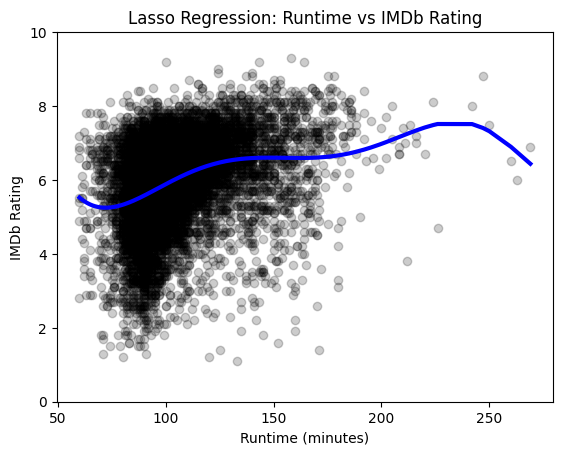

In [24]:
# Assuming df is your DataFrame
df_sorted = df.sort_values(by='Run Time')

X = df_sorted[['Run Time']]
y = df_sorted['Rating']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the number of folds (e.g., 5 for 5-fold cross-validation)
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Define the parameter grid
param_grid = {
    'polynomialfeatures__degree': range(1, 10),
    'lasso__alpha': [0.01, 0.1, 1, 10]
}

# Create the pipeline
model = make_pipeline(PolynomialFeatures(), Lasso())

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_scaled, y)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best Lasso model on the entire dataset
best_model = grid_search.best_estimator_
best_model.fit(X_scaled, y)

# Evaluate the Model
y_pred = best_model.predict(X_scaled)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

results["Lasso Regression"] = {"MSE": mse, "MAE": mae, "R^2": r2}

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plotting with ordered x-values
plt.scatter(X, y, color='black', alpha=0.2)
plt.plot(df_sorted['Run Time'], best_model.predict(X_scaled), color='blue', linewidth=3)
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.title(f'Lasso Regression: Runtime vs IMDb Rating')
plt.ylim(0, 10)
plt.show()

In [25]:
print(results)

{'Linear Regression': {'MSE': 1.1875270448363247, 'MAE': 0.8422876680467926, 'R^2': 0.10582460822809847}, 'Polynomial Regression': {'MSE': 1.1703906278454441, 'MAE': 0.8345494670661158, 'R^2': 0.11872786162600257}, 'Ridge Regression': {'MSE': 1.151991660296368, 'MAE': 0.8277366696828095, 'R^2': 0.13258178106971608}, 'Lasso Regression': {'MSE': 1.15566908730161, 'MAE': 0.8295006690689992, 'R^2': 0.12981277909420486}}
